# Analyzing Browser History Using Python and Pandas

In [ ]:
import pandas as pd
import numpy as np

# On Windows: C:\Users\YOUR USER NAME\AppData\Local\Google\Chrome\User Data\Default\History

```sql
c:\sqlite3 History
.headers on
.mode csv
.output out.csv
select datetime(last_visit_time/1000000-11644473600,'unixepoch') as 'date',url from  urls order by last_visit_time desc;
.exit
```

In [71]:
# Open our file
with open('my-history2.csv') as f:
    content = f.readlines()
# Strip whitespace then split on first occurrence of pipe character
raw_data = [line.split(',', 1) for line in [x.strip() for x in content]]
# We now have a 2D list.
print(raw_data[1])

['12/9/2017 3:23', 'https://www.sqlite.org/']


In [72]:
data = pd.DataFrame(raw_data, columns=['datetime', 'url'])

In [73]:
data.head(5)

,datetime,url
0,12/9/2017 3:25,https://www.sqlite.org/download.html
1,12/9/2017 3:23,https://www.sqlite.org/
2,12/9/2017 3:21,https://superuser.com/questions/602252/can-chr...
3,12/9/2017 2:27,https://applecrazy.github.io/blog/posts/analyz...
4,12/9/2017 2:27,https://t.co/XzZ1Dvxz0q


In [ ]:
data.applymap(lambda x: x.replace('"', '')) #may not require this line; mine dates had extra quotes around them for some reason

In [74]:
data.datetime = pd.to_datetime(data.datetime)

In [75]:
from urllib.parse import urlparse
parser = lambda u: urlparse(u).netloc
data.url = data.url.apply(parser)

In [76]:
data.head(1)

,datetime,url
0,2017-12-09 03:25:00,www.sqlite.org


In [77]:
# Aggregate domain entries
site_frequencies = data.url.value_counts().to_frame()
# Make the domain a column
site_frequencies.reset_index(level=0, inplace=True)
# Rename columns to appropriate names
site_frequencies.columns = ['domain', 'count']
# Display top 2
site_frequencies.head(20)

,domain,count
0,www.facebook.com,2009
1,www.imdb.com,1590
2,www.google.com,1269
3,www.ancestry.com,826
4,www.edsm.net,592
5,www.nytimes.com,440
6,mail.google.com,319
7,,271
8,smile.amazon.com,226
9,coriolis.edcd.io,200


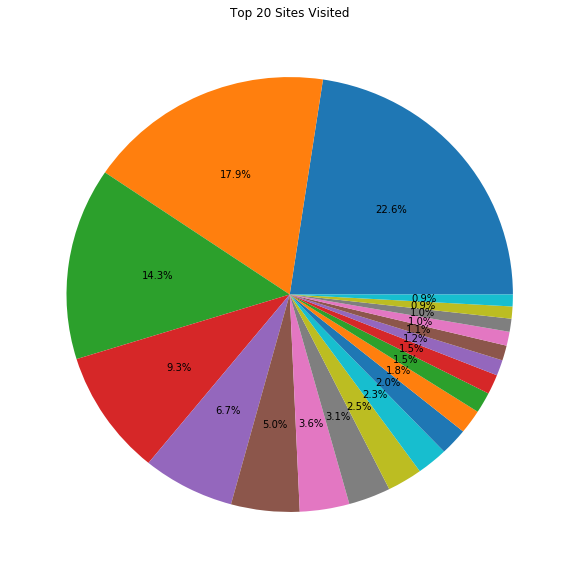

In [78]:
import matplotlib.pyplot as plt
topN = 20
plt.figure(1, figsize=(10,10))
plt.title('Top $n Sites Visited'.replace('$n', str(topN)))
pie_data = site_frequencies['count'].head(topN).tolist()
pie_labels = None
# Uncomment to get specific domain names
# pie_labels = site_frequencies['domain'].head(topN).tolist()
plt.pie(pie_data, autopct='%1.1f%%', labels=pie_labels)
plt.show()

# Resources
 1) https://applecrazy.github.io/blog/posts/analyzing-browser-hist-using-python/